# TP1

## Análisis Exploratorio y Preprocesamiento de Datos

### Exploración Inicial

In [8]:
#Manipulacion de datos y funciones matemáticas
import pandas as pd
import numpy as np

#Visualizaciones
import seaborn as sns
import matplotlib.pyplot as plt

#Modelo Lineal
from sklearn.linear_model import LinearRegression

#Metricas para evaluar modelos
from sklearn import metrics

In [9]:
import pandas as pd

properati = pd.read_csv('./properati_argentina_2021.csv')

In [10]:
properati.shape

(171643, 20)

Hay 460154 filas y 20 columnas

In [11]:
properati.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171643 entries, 0 to 171642
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        171643 non-null  object 
 1   start_date                171643 non-null  object 
 2   end_date                  171643 non-null  object 
 3   created_on                171643 non-null  object 
 4   latitud                   156240 non-null  float64
 5   longitud                  156240 non-null  float64
 6   place_l2                  171643 non-null  object 
 7   place_l3                  163261 non-null  object 
 8   place_l4                  50597 non-null   object 
 9   place_l5                  892 non-null     object 
 10  place_l6                  0 non-null       float64
 11  operation                 171643 non-null  object 
 12  property_type             171643 non-null  object 
 13  property_rooms            138452 non-null  f

Mostramos un poco de informacion en general del dataset

In [12]:
properati.dtypes

id                           object
start_date                   object
end_date                     object
created_on                   object
latitud                     float64
longitud                    float64
place_l2                     object
place_l3                     object
place_l4                     object
place_l5                     object
place_l6                    float64
operation                    object
property_type                object
property_rooms              float64
property_bedrooms           float64
property_surface_total      float64
property_surface_covered    float64
property_price              float64
property_currency            object
property_title               object
dtype: object

Estos son los tipos de las 20 columnas

In [13]:
properati.isnull().sum()

id                               0
start_date                       0
end_date                         0
created_on                       0
latitud                      15403
longitud                     15403
place_l2                         0
place_l3                      8382
place_l4                    121046
place_l5                    170751
place_l6                    171643
operation                        0
property_type                    0
property_rooms               33191
property_bedrooms            41944
property_surface_total       22622
property_surface_covered     12904
property_price                6926
property_currency             7143
property_title                   0
dtype: int64

Vemos que hay filas con datos faltantes

In [14]:

properati_casa_depto = properati[properati.property_type.isin(['Casa', 'PH','Departamento'])]
properati_zona = properati_casa_depto[properati_casa_depto.place_l2.isin(['Capital Federal'])]
properati_operacion = properati_zona[properati_zona.operation.isin(['Venta'])]
properati_limpio = properati_operacion[properati_operacion.property_currency.isin(['USD'])]
properati_limpio.shape

(35468, 20)

Realizamos filtrado por:
*   Tipo de propiedad
*   Zona, que corresponda a capital
*   Tipo de Operación
*   Tipo de moneda


Tomamos en cuenta que es excluyente que los datos no tengan datos faltantes para realizar este primer filtro
Vemos que el dataframe reduce su tamaño.

In [15]:
#CON ESTE COMANDO SE GUARDA
#properati_limpio2 = pd.DataFrame(properati_limpio)
#properati_limpio2.to_csv('properatilimpio.csv',index = False)

In [27]:
from matplotlib import figure


print(properati_limpio.dtypes) #Esto se debería mostrar?

id                           object
start_date                   object
end_date                     object
created_on                   object
latitud                     float64
longitud                    float64
place_l2                     object
place_l3                     object
place_l4                     object
place_l5                     object
place_l6                    float64
operation                    object
property_type                object
property_rooms              float64
property_bedrooms           float64
property_surface_total      float64
property_surface_covered    float64
property_price              float64
property_currency            object
property_title               object
dtype: object


Vemos que las columas *start_date, end_date y created_on* son tipo OBJECT, lo cual decidimos pasarlo a su tipo de dato correspondiente el cual es *datetime*

In [28]:
#properati_limpio['start_date'].unique().size
#properati2 = pd.to_datetime(properati_limpio['start_date'])
#properati2.unique()

In [29]:
print(properati_limpio.describe())

            latitud      longitud  place_l6  property_rooms  \
count  33984.000000  33984.000000       0.0    35032.000000   
mean     -34.589246    -58.454981       NaN        2.810316   
std        0.200089      0.340519       NaN        1.451730   
min      -41.168947    -71.471192       NaN        1.000000   
25%      -34.616113    -58.466816       NaN        2.000000   
50%      -34.595734    -58.439289       NaN        3.000000   
75%      -34.577247    -58.408814       NaN        4.000000   
max      -24.770804    -56.682310       NaN       36.000000   

       property_bedrooms  property_surface_total  property_surface_covered  \
count       31340.000000            33611.000000              34083.000000   
mean            2.011997              105.514117                 90.373676   
std             1.201054              968.083399               1276.571877   
min             1.000000               10.000000                  1.000000   
25%             1.000000               45.

Mostramos las medidas de resumen de las variables cuantitativas continuas. Nos interesa principalmente para la cantidad de ambientes y habitaciones, las superficies y el precio de las propiedades.

La cantidad de valores posibles para el tipo de propiedad es 3.


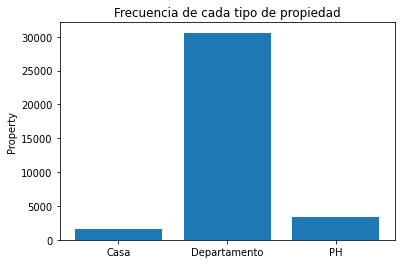

La cantidad de valores posibles para los barrios es 56.


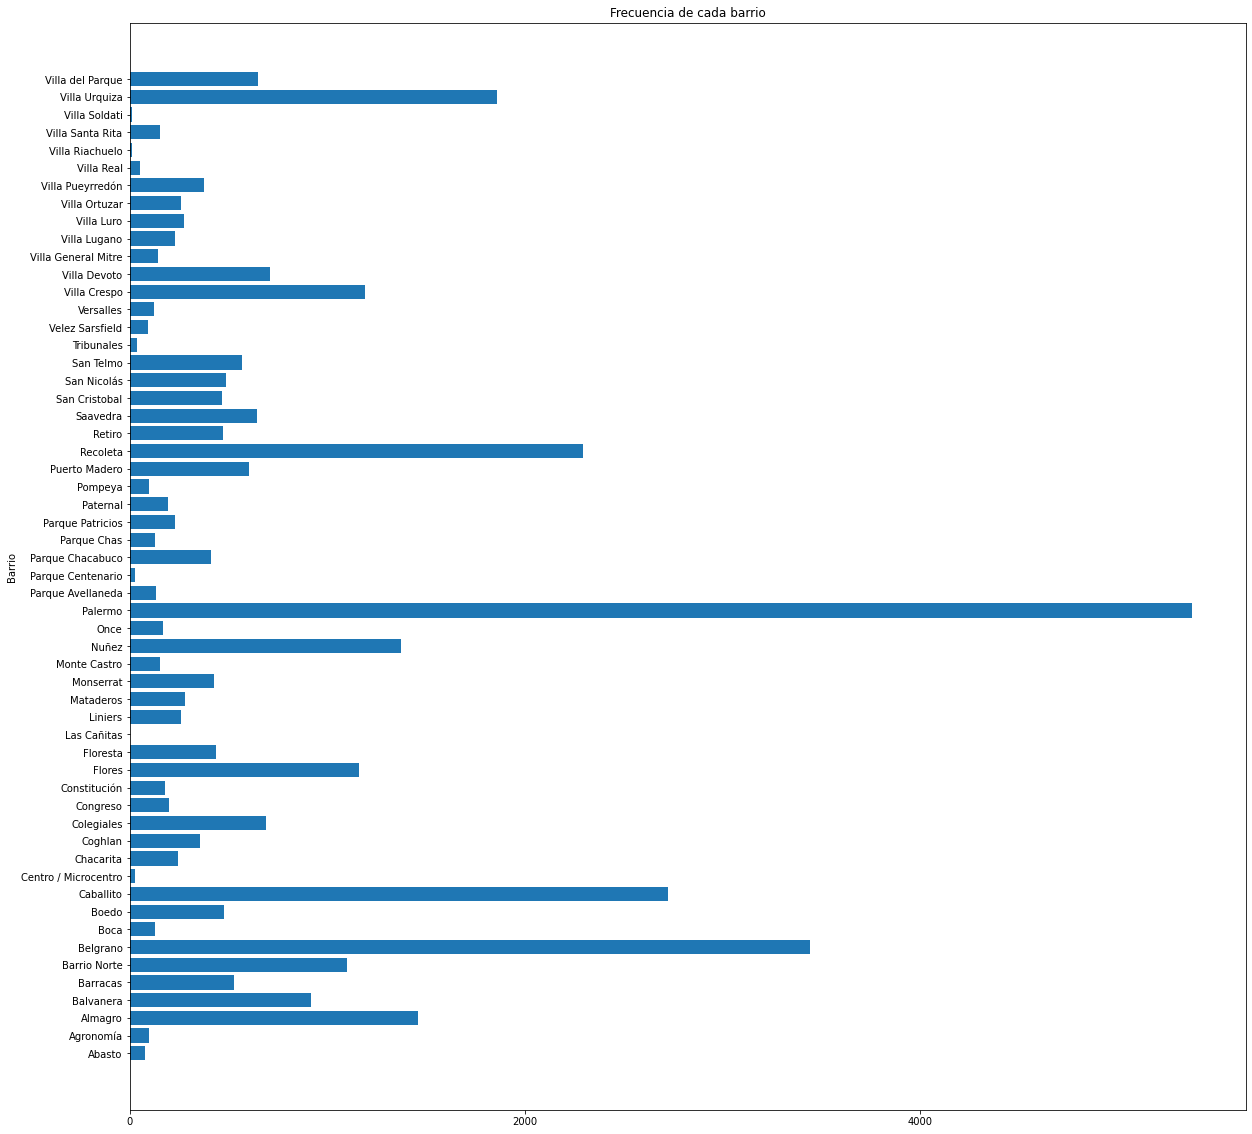

In [30]:
#Se podria agregar una nueva variable la cual se llame STATUS y tenga tres posibles valores: barato, medio o caro. Basandose en el precio de la propiedad
#y separarlos guiandonos por los cuartiles de esta variable

ds_agrupado_property_type=properati_limpio.groupby(['property_type']).count()  #Calculo la frecuencia de cada tipo de propiedad

eje_y = ds_agrupado_property_type["id"].tolist() # Tomamos del ds de tipos de propiedad la columna "id" porque sabemos que todas las propiedades cuentan con ella

eje_x = ds_agrupado_property_type.index.tolist() # Tomamos todos los tipos de propiedades

print("La cantidad de valores posibles para el tipo de propiedad es " + str(len(eje_x)) + ".")

plt.locator_params('x', nbins=3)
plt.bar(eje_x, eje_y)

plt.ylabel('Property')
plt.title('Frecuencia de cada tipo de propiedad')
 
plt.show()

ds_agrupado_place_l3=properati_limpio.groupby(['place_l3']).count()  #Calculo la frecuencia de cada barrio

eje_y = ds_agrupado_place_l3["id"].tolist() # Tomamos del ds de barrios la columna "id" porque sabemos que todas las propiedades cuentan con ella

eje_x = ds_agrupado_place_l3.index.tolist() # Tomamos todos los posibles barrios

print("La cantidad de valores posibles para los barrios es " + str(len(eje_x)) + ".")

plt.figure(figsize=(20, 20))
plt.locator_params('x', nbins=3)
plt.barh(eje_x, eje_y)
plt.ylabel('Barrio')
plt.title('Frecuencia de cada barrio')
plt.show()

Analizamos las variables cualtiativas, indicando la cantidad de valores posibles y su frecuencia.

In [40]:
properati_limpio.head(5)

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,place_l6,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
25,CyZu6IaZgmQYGk8jmPajCg==,2021-09-09,2021-09-26,2021-09-09,NaN,NaN,Capital Federal,NaN,NaN,NaN,NaN,Venta,Casa,4.0,3.0,171.0,133.0,210000.0,USD,VENTA CASA LLAVE EN MANO - COSTA ESMERALDA
42,d3Z0MblSb2IMBoOBMGJEEQ==,2021-09-09,2021-09-26,2021-09-09,-34.637319,-58.361124,Capital Federal,Boca,NaN,NaN,NaN,Venta,Departamento,3.0,2.0,58.0,55.0,82900.0,USD,VENTA TRES AMBIENTES LA BOCA PISO ALTO
43,rL7qPkQnomsMGu2ViS3sBw==,2021-09-09,2021-09-28,2021-09-09,-34.628647,-58.361871,Capital Federal,Boca,NaN,NaN,NaN,Venta,Departamento,4.0,3.0,70.0,70.0,99000.0,USD,Departamento - 4 Ambientes - Catalinas Sur
49,vuX/ccLAMVml4qWRFcOJUA==,2021-09-09,2022-01-05,2021-09-09,-34.610027,-58.401934,Capital Federal,Once,NaN,NaN,NaN,Venta,Departamento,4.0,2.0,NaN,104.0,146000.0,USD,Venta departamento 4 ambientes Once
51,ZTtSCeqZ3HUgf5jjwEzRcw==,2021-09-09,2022-03-09,2021-09-09,-34.631621,-58.416825,Capital Federal,Boedo,NaN,NaN,NaN,Venta,PH,4.0,2.0,NaN,73.0,250000.0,USD,PH - Boedo


Observando algunas de las filas del dataset limpio podemos observar que tanto el id como el título de las propiedades son variables irrelevantes para el análisis.

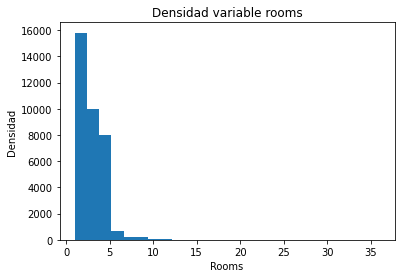

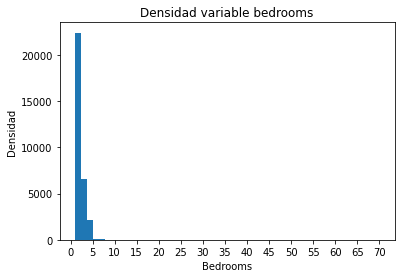

In [37]:
#Distribucion de:

#Ambientes

plt.title('Densidad variable rooms')
plt.hist(properati_limpio['property_rooms'], bins = 25 , alpha = 1)
plt.xlabel("Rooms")
plt.ylabel("Densidad")
plt.show()
#sns_hist=sns.histplot(data=properati_limpio['property_rooms'], kde=True, alpha = 1).set(title="Densidad variable rooms",xlabel="Rooms",ylabel="Densidad")
#plt.show()

#Habitaciones

plt.title('Densidad variable bedrooms')
plt.hist(properati_limpio['property_bedrooms'],  bins = 50 , alpha = 1)
plt.locator_params("x", nbins=30)
plt.xlabel("Bedrooms")
plt.ylabel("Densidad")
plt.show()
#sns_hist=sns.histplot(data=properati_limpio['property_bedrooms'], kde=True, alpha = 1).set(title="Densidad variable bedrooms",xlabel="Bedrooms",ylabel="Densidad")
#plt.show()

Ambos graficos de distribucion nos dicen que la cantidad de ambientes y habitaciones ronda entre 0 y 5 en la mayoria de las propiedades. Tambien se observan valores atipicos: Propiedades con 40 ambientes y 70 habitaciones a los que hay que hacerle un tratamiento para que el grafico sea mas claro modificando/eliminando estos valores que hacen complicada la interpretacion del grafico.

Un buen tratamiento para los datos faltantes de las variables del numero de habitaciones y ambientes seria una regresion lineal con el precio de la propiedad, es decir que en base a su precio se calcule la cantidad de ambientes y habitaciones.

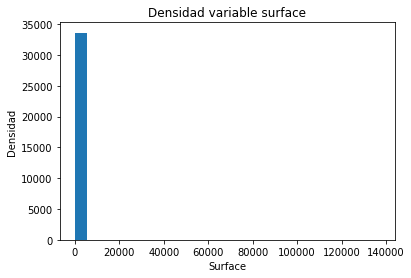

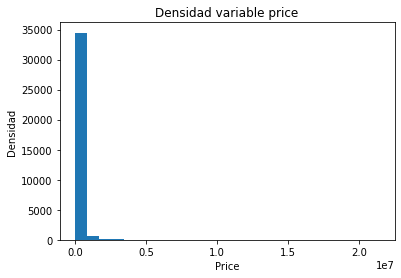

In [38]:
#Superficie
plt.title('Densidad variable surface')
plt.hist(properati_limpio['property_surface_total'], bins = 25 , alpha = 1)
plt.xlabel("Surface")
plt.ylabel("Densidad")
plt.show()
#sns_hist=sns.histplot(data=properati_limpio['property_surface_total'], kde=True, alpha = 1).set(title="Densidad variable surface",xlabel="Surface",ylabel="Densidad")
#plt.show()

#Precio
plt.title('Densidad variable price')
plt.hist(properati_limpio['property_price'], bins = 25 , alpha = 1)
plt.xlabel("Price")
plt.ylabel("Densidad")
plt.show()
#sns_hist=sns.histplot(data=properati_limpio['property_price'], kde=True, alpha = 1).set(title="Densidad variable price",xlabel="Price",ylabel="Densidad")
#plt.show()

TODO: Realizar un análisis gráfico de las distribuciones de las variables superficie y precio.


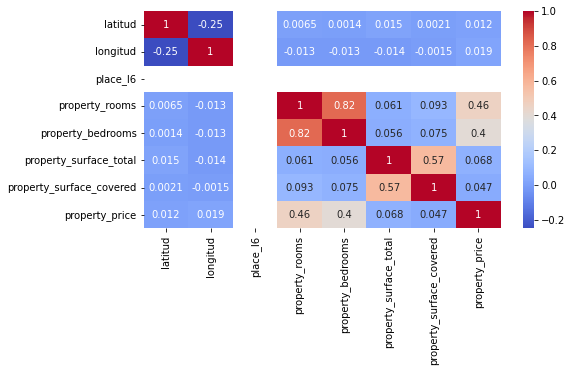

In [34]:
#Heatmap de la correlacion de Pearson entre las variables

matriz_corr_properati = properati_limpio.corr()

plt.figure(figsize = (8,4))
sns.heatmap(matriz_corr_properati, annot = True, cmap='coolwarm')
plt.show()

Como vemos en el mapa de calor las variables de cantidad de habitaciones y cantidad de ambientes estan furtemente correlacionadas ya que el valor de su correlacion de Pearson es cercano a 1.

TODO: Eliminar la variable place_16 o cambiarle el tipo de dato a object ???

TODO: A partir de este análisis generar conclusiones sobre los datos.

### Datos Faltantes

DEBATIR CUAL DE LOS 2 SIGUIENTES GRAFICOS ES EL QUE PIDE LA CONSIGNA

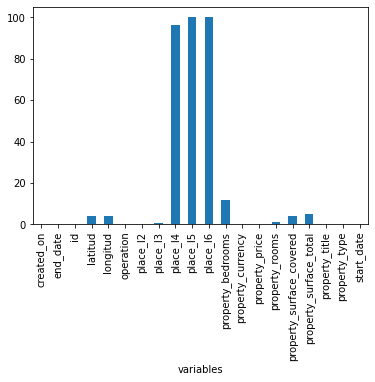

In [39]:
# porcentaje de datos faltantes para graficar sobre el total. 

total = len(properati_limpio)

df_porcentaje_datos_faltantes = pd.DataFrame()                  #creo un nuevo dataset de variables para poder graficar

df_porcentaje_datos_faltantes['variables'] = ['id','start_date','end_date','created_on','latitud','longitud','place_l2','place_l3','place_l4','place_l5','place_l6','operation','property_type','property_rooms','property_bedrooms','property_surface_total','property_surface_covered','property_price','property_currency','property_title']
df_porcentaje_datos_faltantes['porcentaje_faltante'] = [((properati_limpio['id'].isnull().sum() * 100) / total), ((properati_limpio['start_date'].isnull().sum() * 100) / total), ((properati_limpio['end_date'].isnull().sum() * 100) / total),((properati_limpio['created_on'].isnull().sum() * 100) / total),((properati_limpio['latitud'].isnull().sum() * 100) / total),((properati_limpio['longitud'].isnull().sum() * 100) / total),((properati_limpio['place_l2'].isnull().sum() * 100) / total),((properati_limpio['place_l3'].isnull().sum() * 100) / total),((properati_limpio['place_l4'].isnull().sum() * 100) / total),((properati_limpio['place_l5'].isnull().sum() * 100) / total),((properati_limpio['place_l6'].isnull().sum() * 100) / total),((properati_limpio['operation'].isnull().sum() * 100) /total),((properati_limpio['property_type'].isnull().sum() * 100) / total),((properati_limpio['property_rooms'].isnull().sum() * 100) / total),((properati_limpio['property_bedrooms'].isnull().sum() * 100) / total),((properati_limpio['property_surface_total'].isnull().sum() * 100) / total),((properati_limpio['property_surface_covered'].isnull().sum() * 100) / total),((properati_limpio['property_price'].isnull().sum() * 100) / total),((properati_limpio['property_currency'].isnull().sum() * 100) / total),((properati_limpio['property_title'].isnull().sum() * 100) / total)]
df_porcentaje_datos_faltantes.groupby('variables')['porcentaje_faltante'].sum().plot(kind='bar')

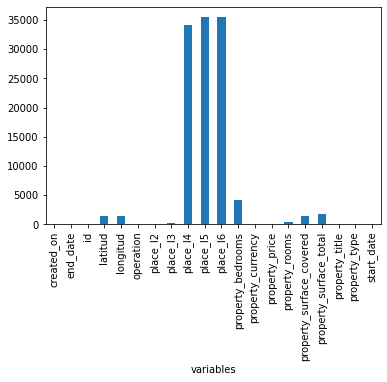

In [41]:
# cantidad de datos faltantes para graficar sobre el total. 

total = len(properati_limpio)

df_datos_faltantes = pd.DataFrame()

df_datos_faltantes['variables'] = ['id','start_date','end_date','created_on','latitud','longitud','place_l2','place_l3','place_l4','place_l5','place_l6','operation','property_type','property_rooms','property_bedrooms','property_surface_total','property_surface_covered','property_price','property_currency','property_title']
df_datos_faltantes['cantidad_datos_faltantes'] = [properati_limpio['id'].isnull().sum(), properati_limpio['start_date'].isnull().sum(), properati_limpio['end_date'].isnull().sum(),properati_limpio['created_on'].isnull().sum(),properati_limpio['latitud'].isnull().sum(), properati_limpio['longitud'].isnull().sum(),properati_limpio['place_l2'].isnull().sum(),properati_limpio['place_l3'].isnull().sum(),properati_limpio['place_l4'].isnull().sum(),properati_limpio['place_l5'].isnull().sum(),properati_limpio['place_l6'].isnull().sum(),properati_limpio['operation'].isnull().sum(),properati_limpio['property_type'].isnull().sum(),properati_limpio['property_rooms'].isnull().sum(),properati_limpio['property_bedrooms'].isnull().sum(),properati_limpio['property_surface_total'].isnull().sum(),properati_limpio['property_surface_covered'].isnull().sum(),properati_limpio['property_price'].isnull().sum(),properati_limpio['property_currency'].isnull().sum(),properati_limpio['property_title'].isnull().sum()]
df_datos_faltantes.groupby('variables')['cantidad_datos_faltantes'].sum().plot(kind='bar')

TODO: Realizar análisis de datos faltantes a nivel de columna. Graficar para cada variable
el porcentaje de datos faltantes con respecto al total del dataset

TODO: Realizar un análisis de datos faltantes a nivel de fila. Calcular el porcentaje de
datos faltantes de cada registro. Realizar un gráfico que permita conocer la
proporción de faltantes por fila en el dataset.

TODO: Determinar, de ser posible, estrategias para reparar los valores faltantes.

TODO: En caso de realizar imputaciones comparar las distribuciones de cada atributo
reparado con la distribución anterior a la imputación de los datos faltantes.

### Valores atípicos

TODO: Detectar valores atípicos en los datos tanto en forma univariada como
multivariada. Realizar gráficos que permitan visualizar los valores atípicos.

TODO: Explicar qué características poseen los datos atípicos detectados.

TODO: Decidir el tratamiento a aplicar sobre los mismos.

TODO: Analizar la relación entre el precio de venta y los metros de superficie ¿hay
valores atípicos que no se detectaron previamente?

### Reducción de la dimensionalidad

TODO: Crear un nuevo dataset que
resulte de aplicar una reducción de dimensionalidad sobre el dataset que se obtuvo al
finalizar el preprocesamiento.

## Agrupamiento

In [ ]:
from sklearn.model_selection import train_test_split

train_set, train_test = train_test_split(properati_limpio, test_size = 0.2, random_state = 1)
